<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/DATA601_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

Historical stock data of SNP500 index from 19/09/2005 to 19/09/2025 was downloaded using the yfinance library, which provides programmatic access to Yahoo Finance's comprehensive financial database.

Dataset consists of:

1.   Time Period: Historical daily data
2.   Data Fields: Six standard financial metrics per trading day:

*  Date: Trading date (Date/DateTime)
*  Open: Opening price (Numeric/Float)
*  High: Highest price during the trading day (Numeric/Float)
*  Low: Lowest price during the trading day (Numeric/Float)
*  Close: Closing price (Numeric/Float)
*  Volume: Number of shares traded per day (Numeric/Integer)

Prices appear in US dollar values
Volume is in absolute number of shares that is traded per day



Below cell that connects Google colab to Googgle drive to access the dataset uploaded to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset of current top 5 five equities of SNP500 index as mentioned in the cell loaded from local CSVs: NVDA, AAPL, MSFT, AMZN, and META, with one file per ticker in the specified Drive folder.

Variables retained: Date (datetime), price fields Open/High/Low/Close/Adj Close (numeric where present), Volume (integer/numeric), and Stock (categorical).

For each stock symbol, the pipeline does the following:

Looking at your code explicitly, here's what's actually done:

**Data Loading Process:**
* File existence check: Verified CSV files exist using `os.path.exists()`
* Data structure validation: Confirmed presence of required 'Date' column with `if 'Date' in df.columns`
* Error handling: Print statements for missing files or missing Date column
* Stock labeling: Added categorical 'Stock' column with `df['Stock'] = stock`

**Cleaning Applied:**
* Date parsing: Converted 'Date' columns to datetime using `pd.to_datetime(df['Date'], errors='coerce')`
* Chronological ordering: Sorted datasets by date using `df.sort_values('Date')`
* Missing value removal: Removed rows with any NaN/NaT using `df.dropna(how='any')`
* Index reset: Reset indices using `reset_index(drop=True)`
* Data consolidation: Combined all stock datasets using `pd.concat(stock_data.values(), ignore_index=True)`
* Secondary cleaning: Applied `dropna(how='any')` and sorted by `['Date','Stock']`
* Previous close calculation: Generated lag feature using `combined_df.groupby('Stock')['Close'].shift(1)`
* Final missing value removal: Final `dropna(how='any')` to remove rows lacking previous close

**Confirmation:**
* Row counts printed for each loaded stock
* Final dataset shape displayed
* Date range coverage shown from min to max dates

In [ ]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder path
folder_path = '/content/drive/MyDrive/SNP500/stock_data/'

# List of stocks to process
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'META']

stock_data = {}

for stock in stocks:
    file_path = f'{folder_path}{stock}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Ensure 'Date' exists and then parse and tag
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Stock'] = stock
            # Sort, drop any row with any NaN, then reset index
            df = df.sort_values('Date').dropna(how='any').reset_index(drop=True)
            stock_data[stock] = df
            print(f"Loaded {stock}: {len(df)}")
        else:
            print(f"Failed to load {stock}: 'Date' column missing")
    else:
        print(f"Failed to load {stock}: file not found")

# Combine all stock data
if stock_data:
    combined_df = pd.concat(stock_data.values(), ignore_index=True)
    # Drop any rows with any NaN (safety) and sort
    combined_df = combined_df.dropna(how='any').sort_values(['Date','Stock']).reset_index(drop=True)
    # Add previous close
    combined_df['Prev_Close'] = combined_df.groupby('Stock')['Close'].shift(1)
    # Drop any rows where Prev_Close is NaN
    combined_df = combined_df.dropna(how='any').reset_index(drop=True)

    print(f"\nCombined dataset: {combined_df.shape}")
    print(f"Date range: {combined_df['Date'].min()} to {combined_df['Date'].max()}")
else:
    print("\nNo stock data was loaded.")


Loaded NVDA: 5033
Loaded AAPL: 5033
Loaded MSFT: 5033
Loaded AMZN: 5033
Loaded META: 3354

Combined dataset: (23481, 8)
Date range: 2005-09-20 00:00:00 to 2025-09-19 00:00:00


In [ ]:
combined_df #to see visually the dataframe created

,Date,Open,High,Low,Close,Volume,Stock,Prev_Close
0,2005-09-20,1.590766,1.615383,1.588665,1.596771,819828800.0,AAPL,1.580259
1,2005-09-20,2.132500,2.150500,2.088500,2.093500,69440000.0,AMZN,2.137500
2,2005-09-20,18.158935,18.263416,17.894248,17.998730,61043400.0,MSFT,18.110184
3,2005-09-20,0.252373,0.258179,0.252067,0.255353,522192000.0,NVDA,0.250463
4,2005-09-21,1.589866,1.592567,1.556843,1.564348,434747600.0,AAPL,1.596771
...,...,...,...,...,...,...,...,...
23476,2025-09-19,241.229996,246.300003,240.210007,245.500000,163470300.0,AAPL,237.880005
23477,2025-09-19,232.369995,234.160004,229.699997,231.479996,97810200.0,AMZN,231.229996
23478,2025-09-19,786.419983,790.799988,769.190002,778.380005,23663700.0,META,780.250000
23479,2025-09-19,510.559998,519.299988,510.309998,517.929993,52371500.0,MSFT,508.450012


This cell reports the dataset shape to show the number of rows and columns in scope.
It then lists each column’s inferred type as Date/Time, Categorical, Numeric (Financial), or Numeric (Count), along with the count of missing values for basic data health.
Volume is handled as a count variable, while price fields (Open, High, Low, Close, Adj Close) are treated as numeric financial measures for analysis.
The stock distribution prints row counts per ticker to confirm coverage and quickly spot any imbalance across symbols.

In [ ]:

# Data Types Analysis
print("Dataset Info:")
print(f"Shape: {combined_df.shape}")

print("\nData Types:")
for col in combined_df.columns:
    dtype = combined_df[col].dtype
    null_count = combined_df[col].isna().sum()

    if 'object' in str(dtype):
        category = "Categorical"
    elif 'datetime' in str(dtype):
        category = "Date/Time"
    elif col == 'Volume':
        category = "Numeric (Count)"
    else:
        category = "Numeric (Financial)"

    print(f"{col}: {category} | Missing: {null_count}")

print(f"\nStock distribution:")
print(combined_df['Stock'].value_counts())

Dataset Info:
Shape: (23481, 8)

Data Types:
Date: Date/Time | Missing: 0
Open: Numeric (Financial) | Missing: 0
High: Numeric (Financial) | Missing: 0
Low: Numeric (Financial) | Missing: 0
Close: Numeric (Financial) | Missing: 0
Volume: Numeric (Count) | Missing: 0
Stock: Categorical | Missing: 0
Prev_Close: Numeric (Financial) | Missing: 0

Stock distribution:
Stock
AAPL    5032
AMZN    5032
MSFT    5032
NVDA    5032
META    3353
Name: count, dtype: int64


This cell reports count, mean, median, standard deviation, min/max, and quartiles for Open, High, Low, Close, and Volume using pandas' built-in statistical functions (len(), data.mean(), data.median(), data.std(), data.min(), data.max(), data.quantile()). Quartiles and the range help flag potential outliers, while a noticeable gap between mean and median can indicate skew.
The ticker comparison filters each stock using combined_df[combined_df['Stock'] == stock] and calculates average Close price with stock_data['Close'].mean(), relative price volatility using (stock_data['Close'].std() / avg_price) × 100 for coefficient of variation, and average Volume with stock_data['Volume'].mean(). Output formatting applies .2f for prices, .1f% for volatility percentages, and :,.0f for volume with comma separators.

In [ ]:

# Summary Statistics
key_vars = ['Open', 'High', 'Low', 'Close', 'Volume']

print("Summary Statistics:")
for var in key_vars:
    data = combined_df[var]
    stats = {
        'count': len(data),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'min': data.min(),
        'max': data.max(),
        'q1': data.quantile(0.25),
        'q3': data.quantile(0.75)
    }

    print(f"\n{var}:")
    for stat, val in stats.items():
      print(f"  {stat}: {val:.2f}")

# Stock comparison
print("\nStock Performance:")
for stock in combined_df['Stock'].unique():
    stock_data = combined_df[combined_df['Stock'] == stock]
    avg_price = stock_data['Close'].mean()
    volatility = (stock_data['Close'].std() / avg_price) * 100
    avg_volume = stock_data['Volume'].mean()
    print(f"{stock}: Avg=${avg_price:.2f}, Volatility={volatility:.1f}%, Volume={avg_volume:,.0f}")

Summary Statistics:

Open:
  count: 23481.00
  mean: 84.32
  median: 26.93
  std: 117.52
  min: 0.14
  max: 791.15
  q1: 6.45
  q3: 131.25

High:
  count: 23481.00
  mean: 85.29
  median: 27.24
  std: 118.82
  min: 0.15
  max: 796.25
  q1: 6.53
  q3: 132.75

Low:
  count: 23481.00
  mean: 83.34
  median: 26.66
  std: 116.16
  min: 0.13
  max: 780.82
  q1: 6.34
  q3: 129.61

Close:
  count: 23481.00
  mean: 84.35
  median: 26.93
  std: 117.52
  min: 0.14
  max: 790.00
  q1: 6.45
  q3: 131.12

Volume:
  count: 23481.00
  mean: 225606187.96
  median: 84532000.00
  std: 307573385.76
  min: 4726100.00
  max: 3692928000.00
  q1: 37901700.00
  q3: 315780000.00

Stock Performance:
AAPL: Avg=$59.03, Volatility=117.8%, Volume=361,789,509
AMZN: Avg=$61.86, Volatility=107.7%, Volume=101,463,098
MSFT: Avg=$116.89, Volatility=114.2%, Volume=42,668,651
NVDA: Avg=$15.60, Volatility=224.7%, Volume=527,909,804
META: Avg=$210.43, Volatility=79.5%, Volume=28,398,746


The table is sorted by Stock and Date so that calculations occur in correct time order.
Daily_Return is the percent day-by-day change in Close, and Price_Change is the absolute difference in Close to show direction and size.
Daily_Volatility uses the intraday range (High − Low)/Open as a simple percent range measure, while Volume_Change captures the percent change in trading activity.
<!-- MA_5 is a 5‑day rolling mean of Close within each ticker to smooth short‑term noise, using min_periods=1 so early days are included.
Price_Position places the Close within the day’s range on a 0–100 scale; if High equals Low, the position defaults to 50 to avoid divide‑by‑zero. -->
Return_Category bins returns into Negative, Neutral, and Positive bands, and Volatility_Level bins intraday range into Low, Medium, and High for straightforward plots and counts.
Price_Change_Category labels each day as Up or Down based on the sign of the Close change, enabling quick distribution comparisons across tickers.

The dataset is sorted by Stock and Date to ensure time-series calculations occur in proper chronological order within each ticker.

**Continuous Features:**
- **Daily_Return** calculates the percent day-over-day change in closing price using `pct_change()`
- **Daily_Volatility** measures intraday price range as (High - Low)/Open × 100, providing a normalized volatility metric
- **Price_Change** captures the absolute dollar difference in closing prices to show direction and magnitude
- **Volume_Change** tracks percent change in trading activity between consecutive days
- **Price_Position** places the closing price within the day's trading range on a 0-100 scale; defaults to 50 when High equals Low to prevent division by zero

**Categorical Features (Binned):**
- **Return_Category** bins daily returns into three groups: Negative (< -0.4%), Neutral (-0.4% to +0.4%), and Positive (> +0.4%) using `pd.cut()`
- **Volatility_Level** categorizes intraday volatility as Low (0-2%), Medium (2-4%), or High (> 4%) based on the Daily_Volatility values
- **Price_Change_Category** creates binary Up/Down labels based on whether the price change is positive or negative

The binning approach using `pd.cut()` with specified breakpoints transforms continuous variables into categorical ones, enabling straightforward distribution analysis and visualization across different market conditions. Finally, `dropna()` removes any incomplete records to ensure clean data for analysis.

In [ ]:
# Data Preprocessing and Feature Engineering
# Sort data properly

combined_df = combined_df.sort_values(['Stock', 'Date']).reset_index(drop=True)

combined_df['Daily_Return'] = combined_df.groupby('Stock')['Close'].pct_change() * 100
combined_df['Daily_Volatility'] = ((combined_df['High'] - combined_df['Low']) / combined_df['Open'] * 100)
combined_df['Price_Change'] = combined_df.groupby('Stock')['Close'].diff()
combined_df['Volume_Change'] = combined_df.groupby('Stock')['Volume'].pct_change() * 100

price_range = combined_df['High'] - combined_df['Low']
combined_df['Price_Position'] = np.where(
    price_range > 0,
    ((combined_df['Close'] - combined_df['Low']) / price_range * 100),
    50
)

combined_df['Return_Category'] = pd.cut(
    combined_df['Daily_Return'],
    bins=[-np.inf, -0.4, 0.4, np.inf],
    labels=['Negative', 'Neutral', 'Positive']
)

combined_df['Volatility_Level'] = pd.cut(
    combined_df['Daily_Volatility'],
    bins=[0, 2, 4, np.inf],
    labels=['Low', 'Medium', 'High']
)

combined_df['Price_Change_Category'] = pd.cut(
    combined_df['Price_Change'],
    bins=[-np.inf, 0, np.inf],
    labels=['Down', 'Up']
)


# Remove rows with any NaN values
combined_df = combined_df.dropna().reset_index(drop=True)
display(combined_df.head(20))
print(f"Features created. Dataset shape: {combined_df.shape}")
print(f"New features: Daily_Return, Daily_Volatility, Price_Change, Volume_Change, MA_5, Price_Position")

,Date,Open,High,Low,Close,Volume,Stock,Prev_Close,Daily_Return,Daily_Volatility,Price_Change,Volume_Change,Price_Position,Return_Category,Volatility_Level,Price_Change_Category
0,2005-09-21,1.589866,1.592567,1.556843,1.564348,4.347476e+08,AAPL,1.596771,-2.030522,2.246973,-0.032423,-46.970929,21.006970,Negative,Medium,Down
1,2005-09-22,1.557443,1.575156,1.540632,1.558043,4.637276e+08,AAPL,1.564348,-0.403004,2.216685,-0.006304,6.665937,50.433480,Negative,Medium,Down
2,2005-09-23,1.564048,1.606076,1.556243,1.597070,5.584572e+08,AAPL,1.558043,2.504863,3.186145,0.039027,20.427855,81.927897,Positive,Medium,Up
3,2005-09-26,1.621987,1.637897,1.600673,1.616283,5.465628e+08,AAPL,1.597070,1.202998,2.294981,0.019213,-2.129868,41.935293,Positive,Medium,Up
4,2005-09-27,1.618684,1.628291,1.603974,1.604275,3.417036e+08,AAPL,1.616283,-0.742966,1.502248,-0.012008,-37.481365,1.234166,Negative,Low,Down
5,2005-09-28,1.593167,1.594369,1.518718,1.533428,1.125544e+09,AAPL,1.604275,-4.416127,4.748448,-0.070847,229.391906,19.444485,Negative,High,Down
6,2005-09-29,1.537930,1.578757,1.525322,1.571253,6.368460e+08,AAPL,1.533428,2.466703,3.474502,0.037825,-43.418827,85.955760,Positive,Medium,Up
7,2005-09-30,1.570953,1.610579,1.557443,1.609379,5.316332e+08,AAPL,1.571253,2.426456,3.382368,0.038126,-16.520917,97.740996,Positive,Medium,Up
8,2005-10-03,1.625890,1.637298,1.611480,1.634296,5.075532e+08,AAPL,1.609379,1.548253,1.587875,0.024917,-4.529439,88.373284,Positive,Low,Up
9,2005-10-04,1.649606,1.661614,1.610279,1.613582,5.394592e+08,AAPL,1.634296,-1.267475,3.111949,-0.020714,6.286238,6.433422,Negative,Medium,Down


Features created. Dataset shape: (23476, 16)
New features: Daily_Return, Daily_Volatility, Price_Change, Volume_Change, MA_5, Price_Position


This plot plotted using matplotlib shows each ticker’s Close over time on the same axes to compare levels and trends.
Titles, axis labels with units, a legend keyed by ticker, and a light grid are included to keep the time series readable.
Lines are drawn in date order for each stock across the full sample period.


Line plots was used for stock price evolution since it is appropriate for time-series data to show trends over time


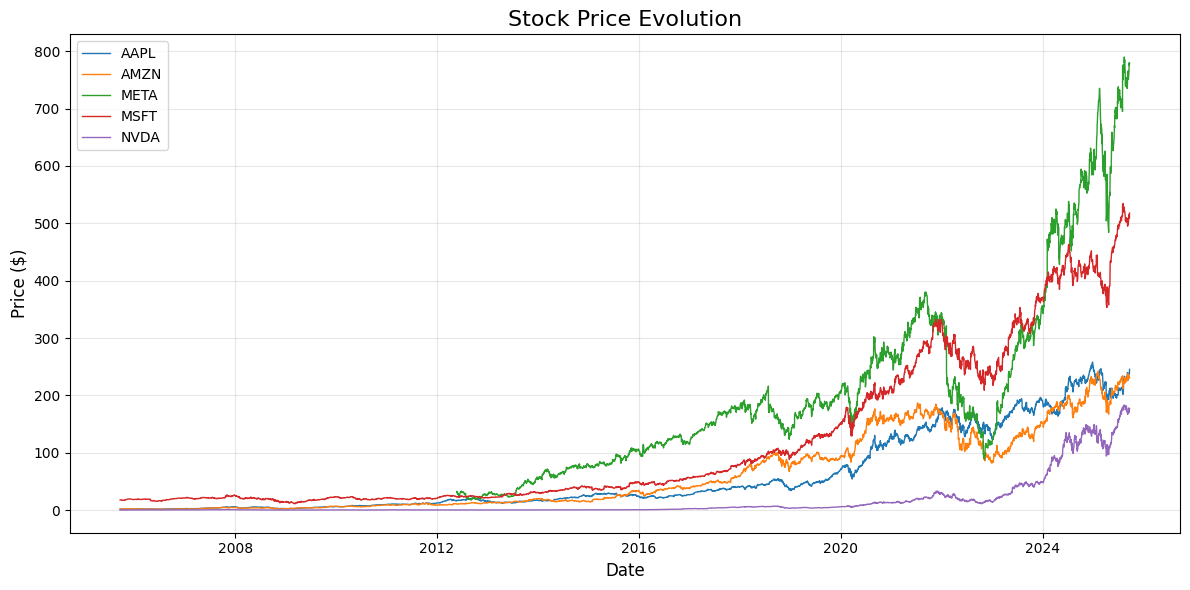

In [ ]:

plt.figure(figsize=(12, 6))

# Stock price evolution
for stock in combined_df['Stock'].unique():
    stock_data = combined_df[combined_df['Stock'] == stock].sort_values('Date')
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, linewidth=1)

plt.title('Stock Price Evolution', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation of Stock Price Evolution graph**

**Price Levels & Growth Trajectories:**
- **NVDA (purple)** shows the most dramatic growth, remaining relatively flat until ~2023, then experiencing strong growth (possibly due to AI boom)
- **META (green)** demonstrates strong consistent growth after its later IPO around 2012
- **MSFT (red)** shows steady appreciation with notable acceleration after 2016
- **AAPL (blue)** and **AMZN (orange)** show more moderate but consistent growth trajectories

- All stocks show synchronized major dips around 2020 (possibly due to COVID), and 2022 (possibly due to Ukraine-Russia war)

**Code Description:**

The code creates a 2x3 grid of bar charts, with each chart showing one stock's daily return distribution. For each stock, it counts how many trading days fell into three categories: Positive returns (green bars), Negative returns (red bars), and Neutral returns (gray bars). The categories are based on the earlier binning where returns < -0.4% = Negative, -0.4% to +0.4% = Neutral, and > +0.4% = Positive.


Bar charts for return distributions since it is good for comparing categorical frequency data across stocks

**Interpretation:**

All five tech stocks (AAPL, AMZN, META, MSFT, NVDA) show similar patterns:
- **Positive days dominate**: Each stock has ~2000+ days with positive returns, suggesting these are generally appreciating assets
- **Negative days are significant**: ~1700-1900 negative days, showing these stocks do experience frequent downturns
- **Few neutral days**: Only ~600-1000 neutral days, indicating these tech stocks tend to move meaningfully rather than staying flat
- **High volatility**: The low number of neutral days suggests these stocks rarely have "boring" trading days - they typically move up or down by more than 0.4%

We cannot really use this data for analysing long term investments since the magnitude of positive or negative return cannot be interpreted from the graphs. BUt this data may be useful for day traders who buys and sells financial assets within the same day to profit from short-term price fluctuations.

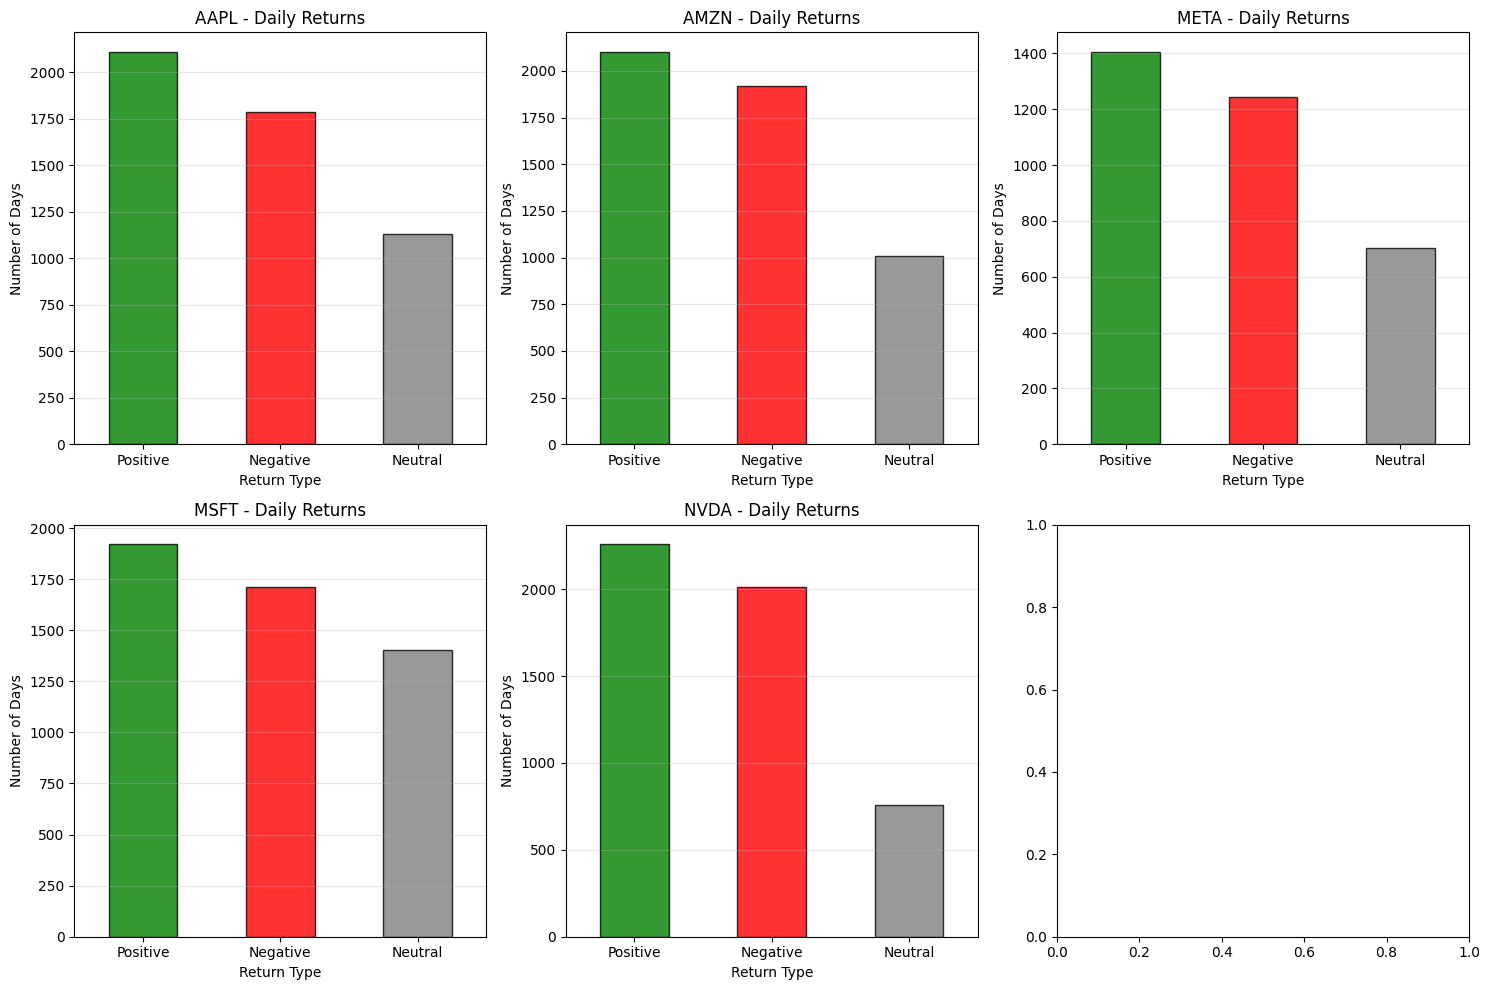

In [ ]:
# Get list of all stock names
stock_names = combined_df['Stock'].unique()

# Create 6 charts in a 2x3 grid
fig, charts = plt.subplots(2, 3, figsize=(15, 10))
charts = charts.flatten()  # Make it easier to access each chart

# Colors for the bars
bar_colors = ['green', 'red', 'gray']

# Make one chart for each stock
for chart_number, stock_name in enumerate(stock_names):

    # Get data for just this one stock
    one_stock_data = combined_df[combined_df['Stock'] == stock_name]

    # Count how many days were Positive, Negative, Neutral
    daily_return_counts = one_stock_data['Return_Category'].value_counts()

    # Make a bar chart
    daily_return_counts.plot(kind='bar',
                           color=bar_colors,
                           alpha=0.8,
                           edgecolor='black',
                           ax=charts[chart_number])

    # Add labels and formatting
    charts[chart_number].set_title(f'{stock_name} - Daily Returns', fontsize=12)
    charts[chart_number].set_xlabel('Return Type', fontsize=10)
    charts[chart_number].set_ylabel('Number of Days', fontsize=10)
    charts[chart_number].tick_params(axis='x', rotation=0)
    charts[chart_number].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Code Description**

This code analyzes the distribution of daily returns for each stock by categorizing them into 8 ranges from "<-5%" to ">5%" and counting how many trading days fall into each range. It calculates the percentage of days in each return category for every stock and stores the results in a DataFrame. This chart bins Daily Return Range into ranges and shows, for each stock, what percentage of trading days fell into each category.



,Stock,Return_Category,Days_in_Range,Percentage
0,AAPL,<-5%,62,1.232359
1,AAPL,-5 to -2%,489,9.719738
2,AAPL,-2 to -1%,555,11.031604
3,AAPL,-1 to 0%,1258,25.004969
4,AAPL,0 to 1%,1270,25.243490
5,AAPL,1 to 2%,786,15.623137
6,AAPL,2 to 5%,538,10.693699
7,AAPL,>5%,73,1.451004
8,AMZN,<-5%,91,1.808786
9,AMZN,-5 to -2%,522,10.375671


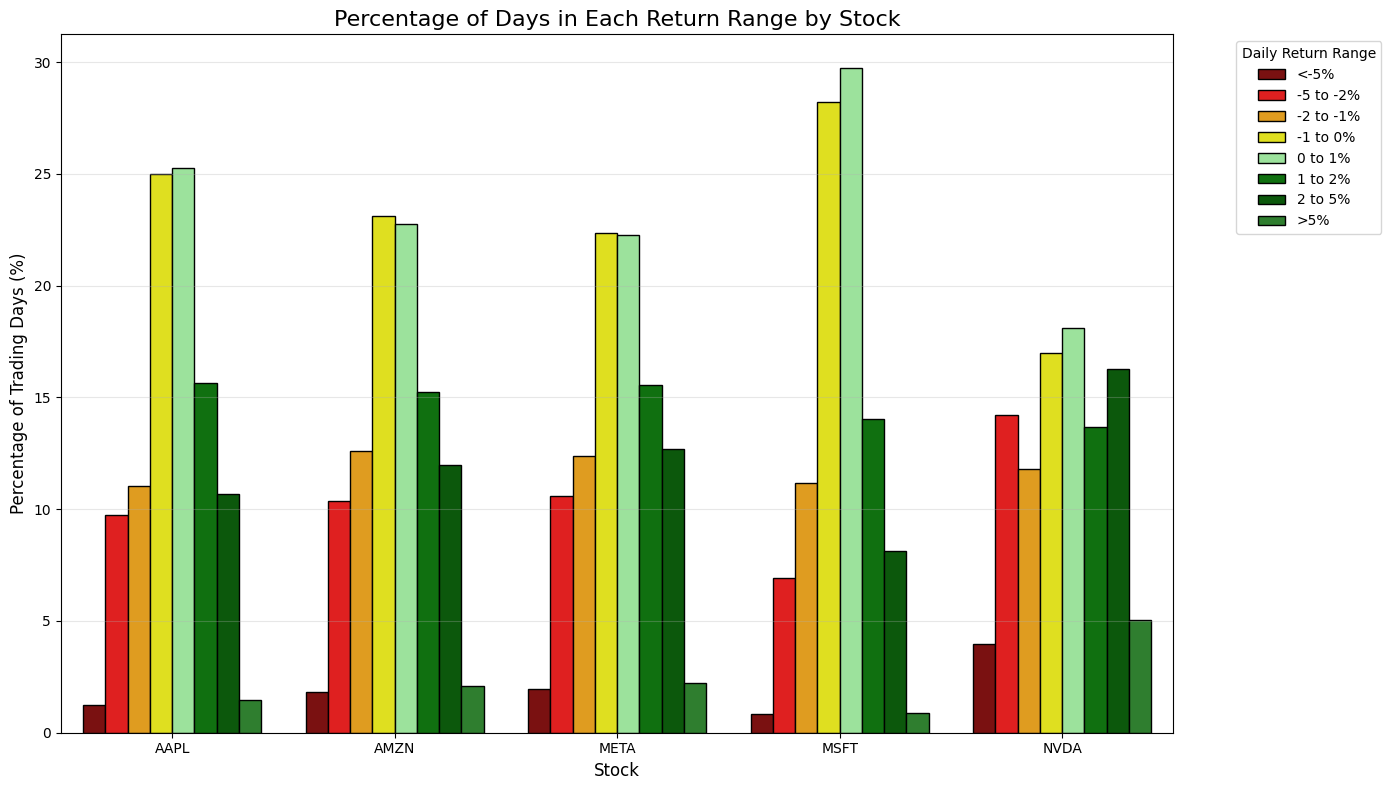

In [33]:
# Simple Daily Return Distribution Analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Define return ranges from worst to best
return_categories = ['<-5%', '-5 to -2%', '-2 to -1%', '-1 to 0%', '0 to 1%', '1 to 2%', '2 to 5%', '>5%']

# The actual number ranges for each category
bucket_ranges = [-100, -5, -2, -1, 0, 1, 2, 5, 100]  # Using -100 and 100 as extremes


stocks_to_analyze = combined_df['Stock'].unique()



all_results = []

for stock_name in stocks_to_analyze:

    # Get daily returns for this stock
    stock_data = combined_df[combined_df['Stock'] == stock_name]
    daily_returns = stock_data['Daily_Return'].dropna()
    total_days = len(daily_returns)


    # Count how many days fall into each return category
    for i, category in enumerate(return_categories):
        min_return = bucket_ranges[i]
        max_return = bucket_ranges[i + 1]

        # Count days in this range
        if i == 0:  # First category: less than -5%
            days_in_range = len(daily_returns[daily_returns < -5])
        elif i == len(return_categories) - 1:  # Last category: greater than 5%
            days_in_range = len(daily_returns[daily_returns >= 5])
        else:  # Middle categories: between two values
            days_in_range = len(daily_returns[(daily_returns >= min_return) & (daily_returns < max_return)])

        # Calculate percentage
        percentage = (days_in_range / total_days) * 100

        # Store the result
        all_results.append({
            'Stock': stock_name,
            'Return_Category': category,
            'Days_in_Range': days_in_range,
            'Percentage': percentage
        })

# table
results_df = pd.DataFrame(all_results)
display(results_df.head(10))

# graph
plt.figure(figsize=(14, 8))

# Get unique stocks for x-axis positioning
unique_stocks = results_df['Stock'].unique()
x_positions = range(len(unique_stocks))

# Set up colors (green spectrum from red to green)
colors = ['darkred', 'red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen', 'forestgreen']

sns.barplot(data=results_df, x='Stock', y='Percentage', hue='Return_Category',
            palette=colors, edgecolor='black')

# Format the chart
plt.title('Percentage of Days in Each Return Range by Stock', fontsize=16)
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Percentage of Trading Days (%)', fontsize=12)
plt.legend(title='Daily Return Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**Interpretation**

Most stocks show similar moderate behavior with relatively balanced distributions, with the majority of trading days falling in the small positive ranges, indicating steady but small daily gains. Overall even with magnitute of returns it shows that positive returns are in general higher than negative returns. This can be useful for long term investors since over the years this shows that the gains are more than losses.

**Code Description:**
The code creates two complementary visualizations using seaborn: a violin plot (left) showing the full distribution shape of daily returns across different volatility levels, and a box plot (right) summarizing daily volatility statistics across return categories. The `plt.subplot(1, 2, 1)` and `plt.subplot(1, 2, 2)` create side-by-side plots, while different color palettes ('Set2', 'Set1') distinguish the visualizations.


Violin plots: Show full distribution shapes of returns across volatility levels, revealing skewness and outliers

Box plots: Show volatility distributions with quartiles, highlighting median and outliers

Although both are similar both are included to provide good interpretations of the data.

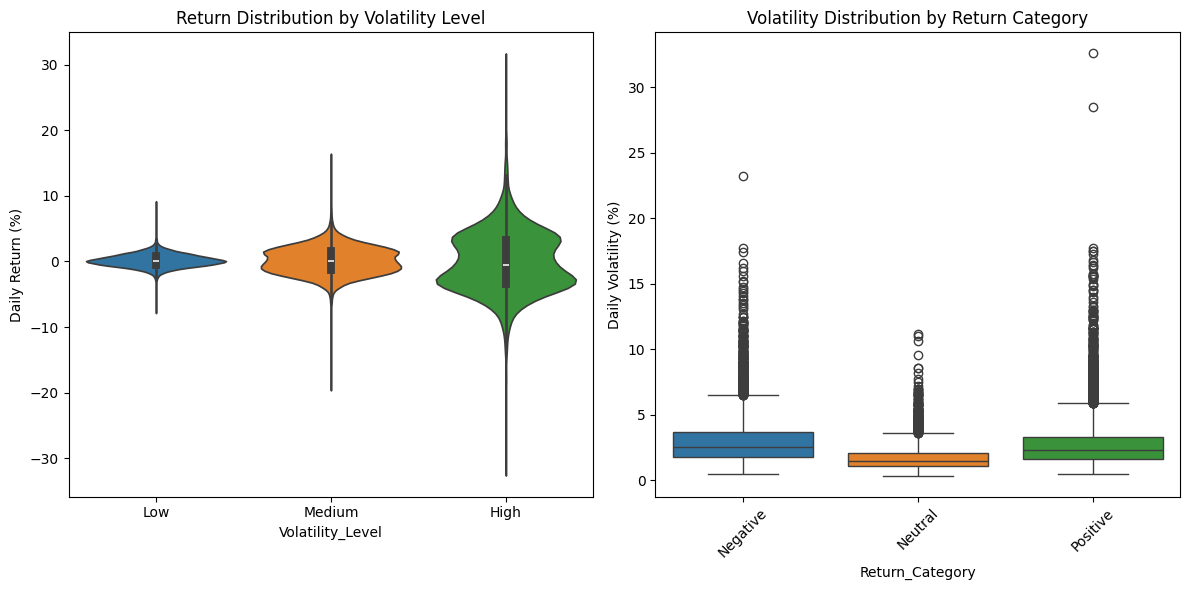

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=combined_df, x='Volatility_Level', y='Daily_Return', hue='Volatility_Level', legend=False)
plt.title('Return Distribution by Volatility Level')
plt.ylabel('Daily Return (%)')

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x='Return_Category', y='Daily_Volatility', hue='Return_Category', legend=False)
plt.title('Volatility Distribution by Return Category')
plt.ylabel('Daily Volatility (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation:**

**Left Plot - Return Distribution by Volatility Level:**
- **Low volatility days** show a narrow, concentrated distribution of returns
- **Medium volatility days** display a wider distribution with returns
- **High volatility days** exhibit the broadest distribution with extreme returns reaching -30% to +30%, demonstrating that high volatility periods can produce both large gains and losses
- All distributions are roughly centered around 0%, but the "width" increases drastically with volatility level

**Right Plot - Volatility Distribution by Return Category:**
- **Negative return days** show median volatility around 3-4%, with many outliers extending to 15%+, suggesting bad news often comes with increased market uncertainty
- **Neutral return days** display the lowest median volatility (~2%), indicating quiet, stable trading periods
- **Positive return days** show slightly higher median volatility than neutral days (~3%), with numerous outliers reaching 15-30%

 These show thata there's a clear relationship between volatility and return magnitude - higher volatility enables both bigger gains and bigger losses, while low volatility constrains returns to smaller ranges. Negative days tend to be more volatile than positive days, reflecting the common market phenomenon that "stocks take the stairs up and the elevator down."

**Code Description:**

This cell computes a Pearson correlation matrix for numeric variables and visualizes it with a masked upper triangle so each pair appears once.
A diverging palette centered at zero highlights direction and strength, with annotations for readable values.
The printed summary lists correlations above a small threshold to focus attention on relationships that are more likely to matter.

Heatmap is good for correlation matrix visualization, using color intensity to represent relationship strength

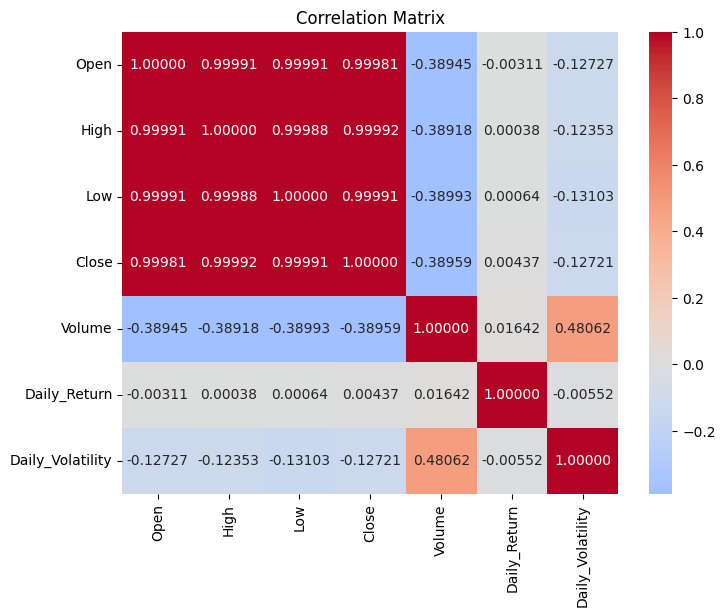

Strong correlations (>0.5):
Open - High: 1.00
Open - Low: 1.00
Open - Close: 1.00
High - Low: 1.00
High - Close: 1.00
Low - Close: 1.00


In [ ]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Daily_Volatility']
corr = combined_df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.5f')
plt.title('Correlation Matrix')
plt.show()

# Print strong correlations (>0.5)
print("Strong correlations (>0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        val = corr.iloc[i, j]
        if abs(val) > 0.5:
            print(f"{corr.columns[i]} - {corr.columns[j]}: {val:.2f}")

**Interpretation:**

Strong Price Relationships (0.999+ correlations):

Open, High, Low, and Close prices move almost perfectly together
Indicates that there is no huge changes happening in stock prices within a single day.

Moderate negative correlation (around -0.39) between stock prices during the day (Open, High, Low, and Close) and Volume. This can indicate that the price of the stock on the particular day influences how much volume is being traded. If the price is lower there are more trades and vice versa.

Very weak correlation (-0.0055) between Daily Returns and Volatility
No clear daily risk-reward relationship
Although we have another interpretation from the violin plot and box plot earlier this can prove that returns aren't predictable from volatility alone. But at the same time correltion may not work well between return and volatility since volatility can cause return to increase or decrease so there is no linear relatonship here.

This code identifies the best and worst 365-day performance periods for each stock by calculating forward-looking annual returns and finding the maximum growth and steepest decline periods.
For every single day in the dataset, the code calculates a potential 365-day return starting from that day.

It then creates a comparison bar chart showing the percentage gains/losses for these extreme periods across all stocks, with green bars for growth and red bars for falls.

,Stock,Type,Start_Date,End_Date,Start_Price,End_Price,Return_Percent
0,AAPL,Best Growth,2006-07-14,2007-12-24,1.521120,5.968000,292.342554
1,AAPL,Worst Fall,2007-09-26,2009-03-09,4.586172,2.494971,-45.597952
2,AMZN,Best Growth,2008-11-20,2010-05-05,1.751500,6.546500,273.765354
3,AMZN,Worst Fall,2021-07-12,2022-12-19,185.927505,84.919998,-54.326285
4,META,Best Growth,2022-11-03,2024-04-18,88.424896,499.591614,464.989765
5,META,Worst Fall,2021-05-26,2022-11-03,325.872253,88.424896,-72.865166
6,MSFT,Best Growth,2020-03-16,2021-08-24,129.171234,292.822296,126.693116
7,MSFT,Worst Fall,2007-11-01,2009-04-15,26.533306,13.870062,-47.725844
8,NVDA,Best Growth,2023-01-05,2024-06-18,14.251528,135.529541,850.982541
9,NVDA,Worst Fall,2007-09-12,2009-02-23,0.761473,0.166415,-78.145703


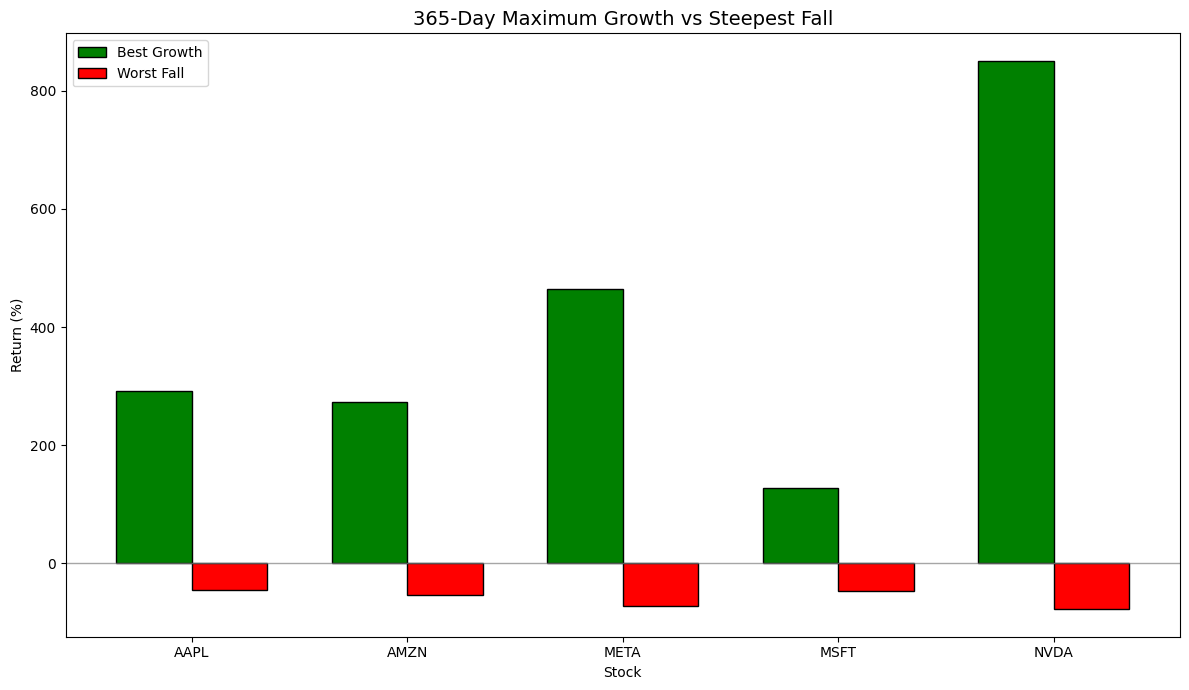

In [34]:
# Sort data so dates go from oldest to newest for each stock
df = combined_df.sort_values(['Stock', 'Date']).copy()
df = df.reset_index(drop=True)

# Calculate all possible 365-day returns
# For every row, calculate what would happen if you bought and held for 365 days
all_returns = []

for i in range(len(df)):
    current_row = df.iloc[i]
    stock_name = current_row['Stock']
    start_date = current_row['Date']
    start_price = current_row['Close']

    # Look for the same stock 364 positions later (which is 365 days total)
    end_position = i + 364

    # Check if we have data 365 days later for the same stock
    if end_position < len(df):
        future_row = df.iloc[end_position]

        # Make sure it's the same stock and prices are valid
        if (future_row['Stock'] == stock_name and
            start_price > 0 and
            future_row['Close'] > 0):

            end_date = future_row['Date']
            end_price = future_row['Close']

            # Calculate the return percentage
            return_percent = ((end_price / start_price) - 1) * 100

            # Store all the details
            all_returns.append({
                'Stock': stock_name,
                'Start_Date': start_date,
                'End_Date': end_date,
                'Start_Price': start_price,
                'End_Price': end_price,
                'Return_Percent': return_percent
            })

# Convert to DataFrame
returns_df = pd.DataFrame(all_returns)

final_results = []

# Go through each stock one by one
for stock_name in df['Stock'].unique():

    # Get all 365-day periods for this stock
    stock_returns = returns_df[returns_df['Stock'] == stock_name]

    if len(stock_returns) > 0:
        # Find the row with highest return (best growth)
        best_growth_idx = stock_returns['Return_Percent'].idxmax()
        best_growth = stock_returns.loc[best_growth_idx]

        # Add to final results
        final_results.append({
            'Stock': stock_name,
            'Type': 'Best Growth',
            'Start_Date': best_growth['Start_Date'],
            'End_Date': best_growth['End_Date'],
            'Start_Price': best_growth['Start_Price'],
            'End_Price': best_growth['End_Price'],
            'Return_Percent': best_growth['Return_Percent']
        })

        # Find the row with lowest return (worst fall)
        worst_fall_idx = stock_returns['Return_Percent'].idxmin()
        worst_fall = stock_returns.loc[worst_fall_idx]

        # Add to final results
        final_results.append({
            'Stock': stock_name,
            'Type': 'Worst Fall',
            'Start_Date': worst_fall['Start_Date'],
            'End_Date': worst_fall['End_Date'],
            'Start_Price': worst_fall['Start_Price'],
            'End_Price': worst_fall['End_Price'],
            'Return_Percent': worst_fall['Return_Percent']
        })

# results table
results_table = pd.DataFrame(final_results)
display(results_table)

# Separate growth and fall data
growth_data = results_table[results_table['Type'] == 'Best Growth'].copy()
fall_data = results_table[results_table['Type'] == 'Worst Fall'].copy()

# bar graph
plt.figure(figsize=(12, 7))

# Get stock names and their positions for x-axis
stock_names = growth_data['Stock'].tolist()
x_positions = list(range(len(stock_names)))

# Create bars side by side
bar_width = 0.35
growth_positions = [x - bar_width/2 for x in x_positions]
fall_positions = [x + bar_width/2 for x in x_positions]

# Plot the bars
growth_bars = plt.bar(growth_positions, growth_data['Return_Percent'],
                     bar_width, label='Best Growth', color='green', edgecolor='black')
fall_bars = plt.bar(fall_positions, fall_data['Return_Percent'],
                   bar_width, label='Worst Fall', color='red', edgecolor='black')

# Add horizontal line at 0%
plt.axhline(0, color='gray', linewidth=1, alpha=0.7)

# Labels and title
plt.title('365-Day Maximum Growth vs Steepest Fall', fontsize=14)
plt.ylabel('Return (%)')
plt.xlabel('Stock')
plt.xticks(x_positions, stock_names)
plt.legend()
plt.tight_layout()
plt.show()

The table lists, for each stock, the single best 365‑day growth window and the single worst 365‑day fall window, with start/end dates, start/end prices, and the simple percent return over that year.
“Growth” marks the top one‑year gain from a given start date, and “Fall” marks the steepest one‑year loss from a given start date; returns are based on Close prices.

The same information can also be interpreted in a visual way from the bar graph above.

**Key Interpretation**

NVDA has a high +851% one‑year increase in 2023–2024, but it also shows the largest drop of 78% in 2007–2009.
META shows a strong increase (+465% in 2022–2024) following a deep decrese (−72.9% in 2021–2022).

**Limitations**

* Dataset only includes successful large-cap tech stocks, not representative of broader market
* These companies survived and thrived, excluding failed companies from analysis
* Only top 5 stocks analyzed, may not represent sector-wide patterns
* Analysis excludes companies that may have failed or been delisted
* Limitation: Past performance does not guarantee future results since there is volatility even long term as seen in line graph that shows stock prices over time.
* No consideration of market events, earnings, or economic indicators that drive price movements
* Patterns observed may be specific to the analysis period and world events and not generalizable

EDA revealed strong correlations between daily price metrics (Open/High/Low/Close) but weak correlation among other parameters as can be seen from coorelation heatmap
Distribution analysis showed all stocks have more positive than negative trading days, supporting long-term growth
Demonstrated that extreme returns (both positive and negative) occur during high volatility periods
Analysis identified specific periods of exceptional growth and significant falls